# Contexto do projeto
Obesidade está entre as doenças mais graves do século, é um problema que além de prejudicar uma quantidade enorme de pessoas (as projeções são que até 2050 mais de a metade das pessoas do mundo seja obesas), custa autíssimo para a saúde pública e para os planos de saúde, já que está fortemente ligado a diabetes, hipertensão e outras 62 doenças.

Dessa forma buscamos entender com esse projeto as causas e consequências da obesidade, bem como sua relação com a diabetes e hipertensão, já que são as duas principais doenças relacionadas.

Para tanto faremos uso de 7 datasets.

In [137]:
# faz todos os imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## IDH no mundo
Esse dataset descreve a curva de IDH no mundo por região ao longo dos anos

In [81]:
humanDevelopmentIndex = pd.read_csv('./data/HumanDevelopmentIndex.csv')
humanDevelopmentIndex = humanDevelopmentIndex.set_index('Country')
humanDevelopmentIndex.index = humanDevelopmentIndex.index.str.strip()

humanDevelopmentIndex.head()

,HDI Rank (2017),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
Albania,68,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,0.652,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
Algeria,85,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,0.627,...,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754
Andorra,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
Angola,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.502,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581


## Obesidade no mundo
Esse dataset descreve o crescimento da obesidade ao longo dos anos por país. Esses dados foram coletados do Our World in Data, site que reúne dados e visualizações de vários datasets.

A fonte dos dados foi uma coleta realizada pela UNICEF em parceria com alguns outros grupos.

Os dados estão resumidos por país, ano e percentual de obesos em cada país/ano.

In [156]:
worldObesity = pd.read_csv('./data/share-of-adults-defined-as-obese.csv')
worldObesity.columns = ['entity', 'code', 'year', 'obesityPercentage']
worldObesity = worldObesity.drop(columns=['code'])
worldObesity.year = worldObesity.year.astype('int64')
worldObesity = worldObesity.set_index('entity')
worldObesity.head()

,year,obesityPercentage
entity,,
Afghanistan,1975,0.5
Afghanistan,1976,0.5
Afghanistan,1977,0.6
Afghanistan,1978,0.6
Afghanistan,1979,0.6


#### Relação obesidade e IDH
Com esses dois datasets podemos relacionar o IDH com o percentual de obesos em cada país no passar dos anos

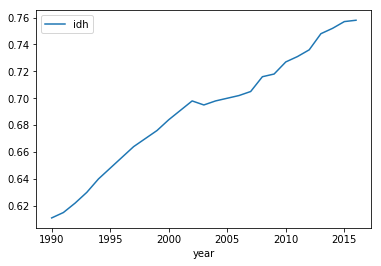

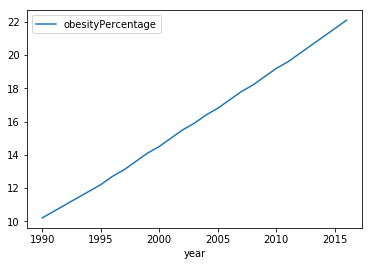

In [159]:
brazilObesity = worldObesity.loc['Brazil']
brazilIdh = humanDevelopmentIndex.loc['Brazil']
brazilIdh = brazilIdh.to_frame()
brazilIdh = brazilIdh.drop('HDI Rank (2017)')
brazilIdh = brazilIdh.reset_index()
brazilIdh = brazilIdh.rename(columns={'index': 'year'})
brazilIdh.year = brazilIdh.year.astype('int64')
brazilIdh = brazilIdh.rename(columns={'Brazil': 'idh'})
relationObesityIdhBrazil = brazilObesity.join(brazilIdh.set_index('year'), on='year')
relationObesityIdhBrazil = relationObesityIdhBrazil.dropna()
relationObesityIdhBrazil.plot(x='year', y='idh')
relationObesityIdhBrazil.plot(x='year', y='obesityPercentage')


## Diabetes no mundo
Esse dataset descreve a diabetes no mundo por região, sexto e tipo de moradia (rural ou urbana)

In [2]:
worldDiabetes = pd.read_csv('./data/IDFDiabetesAtlas-PrevalenceByAgeSexUrbanRural20-79years.csv')
worldDiabetes.head()

,country_id,report_country,IDF region,Report Age,Report Gender,Report set,"Adults with diabetes (20-79) in 1,000s","Adults population (20-79) in 1,000s",Diabetes prevalence (20-79)
0,1,Afghanistan,MENA,20-24,Female,Urban,6.786987,442.695289,1.53%
1,1,Afghanistan,MENA,20-24,Female,Rural,14.764568,1162.984711,1.27%
2,1,Afghanistan,MENA,25-29,Female,Urban,9.788225,347.899364,2.81%
3,1,Afghanistan,MENA,25-29,Female,Rural,21.052534,913.950636,2.30%
4,1,Afghanistan,MENA,30-34,Female,Urban,13.800323,288.586775,4.78%


## Cirurgias bariátricas nos EUA
Esse dataset descreve o crescimento de cirurgias bariátricas nos EUA ao longo dos anos.

In [3]:
bariatricSurgeriesUS = pd.read_csv('./data/bariatricSurgeriesInUsfrom2011to2017.csv')
bariatricSurgeriesUS.head()

,Unnamed: 0,2011,2012,2013,2014,2015,2016,2017
0,Total,158,173,179,193,196,216,228
1,Sleeve,17.80%,33.00%,42.10%,51.70%,53.61%,58.11%,59.39%
2,RYGB,36.70%,37.50%,34.20%,26.80%,23.02%,18.69%,17.80%
3,Band,35.40%,20.20%,14.00%,9.50%,5.68%,3.39%,2.77%
4,BPD-DS,0.90%,1.00%,1.00%,0.40%,0.60%,0.57%,0.70%


## Informações clínicas de pacientes no Brasil
Esse dataset descreve alguns fatores clínicos de pacientes no Brasil, dentre as labels inclui 'eObeso'

In [4]:
obesityClinicalInfo = pd.read_csv('./data/obesidade.csv')
obesityClinicalInfo.head()

,ID,Idade,GeneroCod,Eobeso,fumo_atual,imc,obesoHer,cc,cq,rcq,frqCardiaca,fumo,atvFisica,stress,psisto,pdiasto,psisalta
0,1,20.0,2.0,Não,0,27.94,0,95.0,112,0.85,75,0.0,2.0,3.0,120.00,80.00,0.0
1,2,31.0,1.0,Não,0,28.76,0,88.0,101,0.87,66,0.0,2.0,0.0,128.00,74.33,1.0
2,3,19.0,2.0,Não,0,25.35,0,79.0,102,0.77,69,0.0,2.0,0.0,113.33,70.00,0.0
3,4,20.0,2.0,Não,0,20.73,0,91.0,80,1.14,85,0.0,0.0,0.0,130.00,76.67,1.0
4,5,19.0,2.0,Não,0,24.54,0,83.0,98,0.85,72,0.0,2.0,0.0,130.00,80.00,1.0


## NationalHealthAndNutritionExaminationSurvey
Esse dataset contém informações detalhadas sobre demografia, dieta, exames e medicamentos de pacientes nos EUA

In [6]:
#NationalHealthAndNutritionExaminationSurvey data
demographic = pd.read_csv('./data/NationalHealthAndNutritionExaminationSurvey/demographic.csv')
diet = pd.read_csv('./data/NationalHealthAndNutritionExaminationSurvey/diet.csv')
examination = pd.read_csv('./data/NationalHealthAndNutritionExaminationSurvey/examination.csv')
labs = pd.read_csv('./data/NationalHealthAndNutritionExaminationSurvey/labs.csv')
medications = pd.read_csv('./data/NationalHealthAndNutritionExaminationSurvey/medications.csv')
questionnaire = pd.read_csv('./data/NationalHealthAndNutritionExaminationSurvey/questionnaire.csv')

In [7]:
demographic.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [8]:
diet.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [9]:
examination.head()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0


In [10]:
labs.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


In [11]:
medications.head()

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,73557,1,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,73557,1,INSULIN,d00262,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0
2,73558,1,GABAPENTIN,d03182,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0
3,73558,1,INSULIN GLARGINE,d04538,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,4.0
4,73558,1,OLMESARTAN,d04801,1.0,14.0,E11.2,NaN,NaN,Type 2 diabetes mellitus with kidney complicat...,NaN,NaN,4.0


In [12]:
questionnaire.head()

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN
